In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ValueError: JAX requires ml_dtypes version 0.4.0 or newer; installed version is 0.3.2.

In [ ]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32
EPOCHS = 20

In [ ]:
# Path to your dataset (ensure it has 'Normal' and 'Monkeypox' subfolders)
DATASET_DIR = 'Dataset'

In [4]:
# Load images and labels
def load_images_and_labels(dataset_dir):
    images = []
    labels = []
    class_names = os.listdir(dataset_dir)  # List subfolder names (e.g., 'Normal' and 'Monkeypox')
    class_names.sort()  # Sort to ensure correct labeling (Normal -> 0, Monkeypox -> 1)
    
    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(dataset_dir, class_name)
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            try:
                # Load image, resize, and normalize
                img = load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
                img_array = img_to_array(img) / 255.0  # Normalize pixel values
                images.append(img_array)
                labels.append(label)  # Use 0 for 'Normal', 1 for 'Monkeypox'
            except Exception as e:
                print(f"Error loading image {img_file}: {e}")
    
    images, labels = shuffle(np.array(images), np.array(labels), random_state=42)
    return images, labels

In [5]:
X, y = load_images_and_labels(DATASET_DIR)
print(f"Loaded {len(X)} images from {DATASET_DIR}. Classes: {np.unique(y)}")

Loaded 479 images from Dataset. Classes: [0 1]


In [6]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

c:\Users\job01\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)

# Save the trained model
model.save('cnn_monkeypox_model.h5')

print("Model training completed and saved as 'cnn_monkeypox_model.h5'.")

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 543ms/step - accuracy: 0.5468 - loss: 1.7318 - val_accuracy: 0.4062 - val_loss: 0.6918
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 477ms/step - accuracy: 0.5179 - loss: 0.6895 - val_accuracy: 0.5104 - val_loss: 0.6815
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 473ms/step - accuracy: 0.6188 - loss: 0.6580 - val_accuracy: 0.8333 - val_loss: 0.5747
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 498ms/step - accuracy: 0.6586 - loss: 0.6112 - val_accuracy: 0.6354 - val_loss: 0.6182
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 552ms/step - accuracy: 0.6902 - loss: 0.5836 - val_accuracy: 0.8333 - val_loss: 0.5069
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 478ms/step - accuracy: 0.7727 - loss: 0.5020 - val_accuracy: 0.8021 - val_loss: 0.4628
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 475ms/step - accuracy: 0.7339 - loss: 0.4860 - val_accuracy: 0.8854 - val_loss: 0.3922
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 478ms/step - accuracy: 0.7935 - loss: 0.4714 - val_accuracy: 

Model training completed and saved as 'cnn_monkeypox_model.h5'.


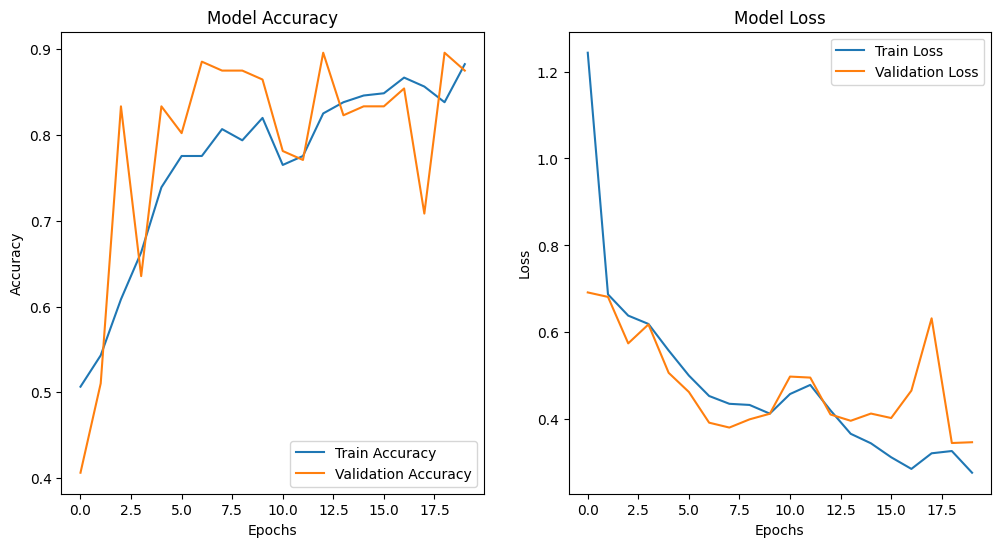

In [9]:
# Plotting the Accuracy and Loss Graphs
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 427ms/step


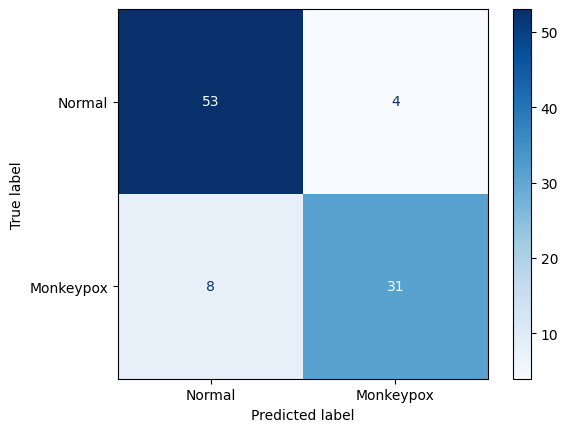

In [ ]:
y_pred = (model.predict(X_val) > 0.5).astype("int32")  # Convert predictions to 0 or 1
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Monkeypox"])
disp.plot(cmap='Blues', values_format='d')
plt.show()